In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [202]:
trained_data_complete = np.loadtxt("train32.csv",
                 delimiter=",", dtype=float)

In [203]:
train_data = trained_data_complete[:64,:2]
validation_data = trained_data_complete[64:79,:2]
Y_train_data = trained_data_complete[:64,2:3]
Y_validation_data = trained_data_complete[64:79,2:3]

In [204]:
def normalize(X_data_set):
    X1 = X_data_set[:X_data_set.shape[0],:1]
    X2 = X_data_set[:X_data_set.shape[0],1:2]
    mu1 = np.mean(X1)
    sd1 = np.std(X1)
    mu2 = np.mean(X2)
    sd2 = np.std(X2)
    for i in range(X_data_set.shape[0]):
        X_data_set[i][0] = (X_data_set[i][0]-mu1)/sd1
        X_data_set[i][1] = (X_data_set[i][1]-mu2)/sd2
    return X_data_set


In [205]:
def getXmat(k,data_set):
    data_set = normalize(data_set)
    total_col = (k+1)*(k+2)//2
    total_row = len(data_set)
    X_mat=[]
    
    for i in range(total_row):
            temp_array = []
            for u in range(k+1):
                for v in range(u+1):
                    temp_array.append(data_set[i][0]**(u-v)*data_set[i][1]**v)
            X_mat.append(temp_array)        
                  
    return X_mat  

In [206]:
def getbeta(k,X_data,Y_data):
    
    X_temp=getXmat(k,X_data)
    X=np.asarray(X_temp)
    prod = np.linalg.pinv(X)
    beta=np.dot(prod,Y_data)        # (X*T * X) -1 * XT * Y
    return beta

In [207]:
def getMeansquareerror (Y_pred, Y_actual) :
    error = 0
    for i in range(len(Y_pred)):
        error = error + (Y_pred[i]-Y_actual[i])**2
        
    MSE = error/(len(Y_pred))
    
    return MSE

# MSE VS DEGREE OF POLYNOMIAL FOR TRAIN DATA

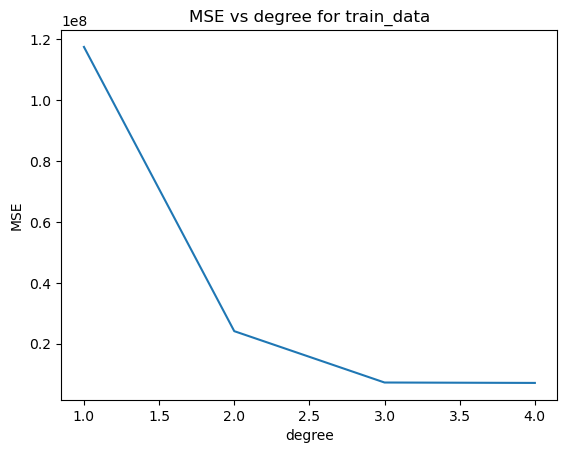

7107185.8779953085


In [210]:
Y_actual = Y_train_data
MSE_values = []
degree = [x for x in range(1,5)]
for i in range(1,5):
    X = getXmat(i,train_data)
    X = np.asarray(X)
    beta = getbeta(i,train_data,Y_train_data)
#     print("for degree ", i , " beta is \n",beta)
    Y_pred = np.dot(X,beta)
    temp = float(getMeansquareerror(Y_pred, Y_actual))
    MSE_values.append(temp)
    
plt.title("MSE vs degree for train_data")
plt.xlabel("degree")
plt.ylabel("MSE")
plt.plot(degree, MSE_values)
plt.show()
print(min(MSE_values))


# MSE VS DEGREE OF POLYNOMIAL FOR VALIDATION DATA

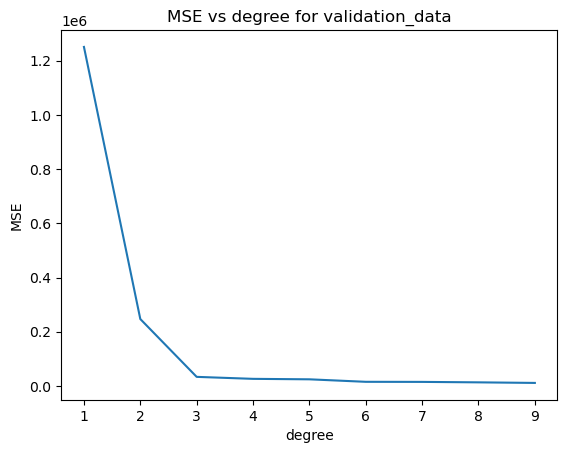

In [213]:
Y_actual = Y_validation_data
MSE_values = []
degree = [x for x in range(1,10)]
for i in range(1,10):
    X = getXmat(i,validation_data)
    X = np.asarray(X)
    beta = getbeta(i,validation_data,Y_validation_data)
#     print("for degree ", i , " beta is \n",beta) 
    Y_pred = np.dot(X,beta)
    temp = float(getMeansquareerror(Y_pred, Y_actual))
    MSE_values.append(temp)
plt.title("MSE vs degree for validation_data")
plt.xlabel("degree")
plt.ylabel("MSE")
plt.plot(degree, MSE_values)
plt.show()


# PLOT FOR TRAIN DATA FOR VARIOUS DEGREES(1,2,3,4)


In [214]:
X1 = trained_data_complete[:64,0:1]
X2 = trained_data_complete[:64,1:2]
Y  = trained_data_complete[:64,2:3]

X1_validation = trained_data_complete[64:79,0:1]
X2_validation = trained_data_complete[64:79,1:2]
Y_validation = trained_data_complete[64:79,2:3]


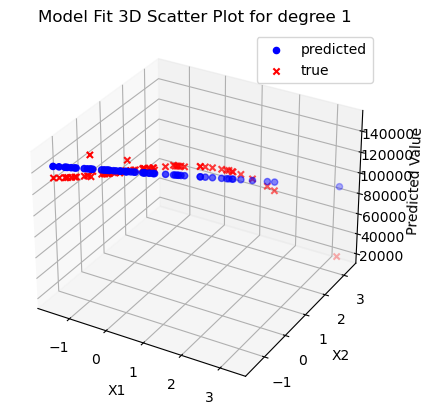

In [215]:
X = getXmat(1,train_data)
X = np.asarray(X)
beta = getbeta(1,train_data,Y_train_data)
Y_pred = np.dot(X,beta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Predicted Value')
ax.set_title('Model Fit 3D Scatter Plot for degree 1')
ax.legend()
plt.show()

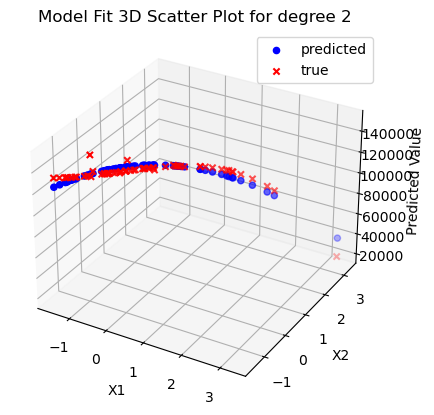

In [216]:
X = getXmat(2,train_data)
X = np.asarray(X)
beta = getbeta(2,train_data,Y_train_data)
Y_pred = np.dot(X,beta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Predicted Value')
ax.set_title('Model Fit 3D Scatter Plot for degree 2')
ax.legend()
plt.show()



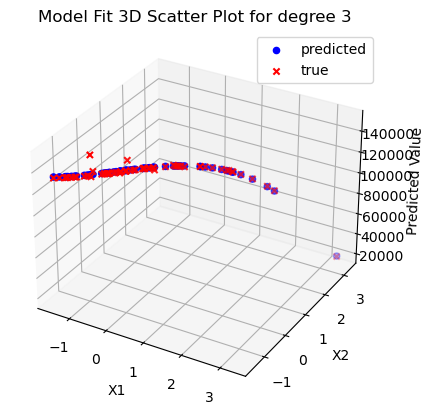

In [217]:
X = getXmat(3,train_data)
X = np.asarray(X)
beta = getbeta(3,train_data,Y_train_data)
Y_pred = np.dot(X,beta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Predicted Value')
ax.set_title('Model Fit 3D Scatter Plot for degree 3')
ax.legend()
plt.show()

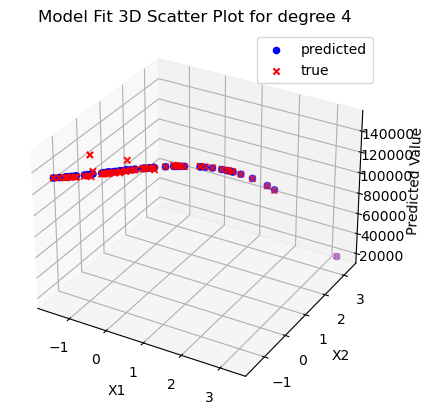

In [218]:
X = getXmat(4,train_data)
X = np.asarray(X)
beta = getbeta(4,train_data,Y_train_data)
Y_pred = np.dot(X,beta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Predicted Value')
ax.set_title('Model Fit 3D Scatter Plot for degree 4')
ax.legend()
plt.show()

# PLOT FOR VALIDATION DATA FOR VARIOUS DEGREES(1,2,3,4)

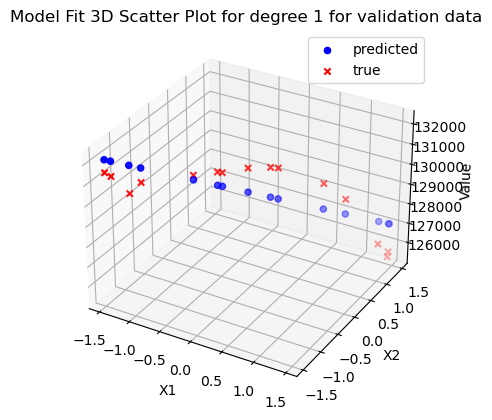

In [219]:
X1 = trained_data_complete[64:79,0:1]
X2 = trained_data_complete[64:79,1:2]
Y_validation_data  = trained_data_complete[64:79,2:3]

X = getXmat(1,validation_data)
X = np.asarray(X)
beta = getbeta(1,validation_data,Y_validation_data)
Y_pred = np.dot(X,beta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y_validation_data,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Value')
ax.set_title('Model Fit 3D Scatter Plot for degree 1 for validation data')
ax.legend()
plt.show()



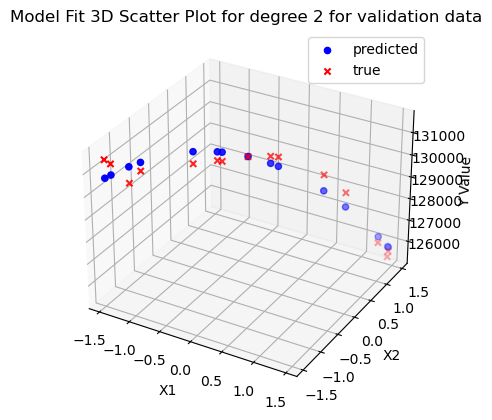

In [220]:
X1 = trained_data_complete[64:79,0:1]
X2 = trained_data_complete[64:79,1:2]
Y_validation_data  = trained_data_complete[64:79,2:3]

X = getXmat(2,validation_data)
X = np.asarray(X)
beta = getbeta(2,validation_data,Y_validation_data)
Y_pred = np.dot(X,beta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y_validation_data,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y Value')
ax.set_title('Model Fit 3D Scatter Plot for degree 2 for validation data')
ax.legend()
plt.show()

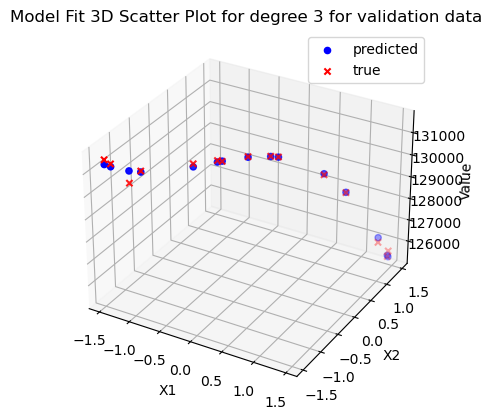

In [221]:
X1 = trained_data_complete[64:79,0:1]
X2 = trained_data_complete[64:79,1:2]
Y_validation_data  = trained_data_complete[64:79,2:3]

X = getXmat(3,validation_data)
X = np.asarray(X)
beta = getbeta(3,validation_data,Y_validation_data)
Y_pred = np.dot(X,beta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y_validation_data,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Value')
ax.set_title('Model Fit 3D Scatter Plot for degree 3 for validation data')
ax.legend()
plt.show()

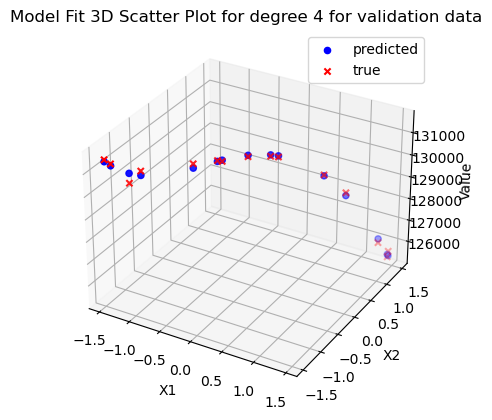

In [222]:
X1 = trained_data_complete[64:79,0:1]
X2 = trained_data_complete[64:79,1:2]
Y_validation_data  = trained_data_complete[64:79,2:3]

X = getXmat(4,validation_data)
X = np.asarray(X)
beta = getbeta(4,validation_data,Y_validation_data)
Y_pred = np.dot(X,beta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y_validation_data,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Value')
ax.set_title('Model Fit 3D Scatter Plot for degree 4 for validation data')
ax.legend()
plt.show()

# ERROR USING BEST MODEL FOR TRAIN AND TEST DATA

THE BEST MODEL IS THE POLYNOMIAL WITH DEGREE 3

In [223]:
# TRAIN DATA MSE

Y_actual = trained_data_complete[:64,-1]
X = getXmat(3,trained_data_complete[:64,:2])
X = np.asarray(X)
beta = getbeta(3,trained_data_complete[:64,:2],Y_actual)
#     print("for degree ", i , " beta is \n",beta)
Y_pred = np.dot(X,beta)
MSE = float(getMeansquareerror(Y_pred, Y_actual))
print(MSE)

7241671.642107806


In [224]:
# TEST DATA
test_data = np.loadtxt("test32.csv",
                 delimiter=",", dtype=float)
Y_actual = test_data[:test_data.shape[0],-1]
X = getXmat(3,test_data[:test_data.shape[0],:2])
X = np.asarray(X)
beta = getbeta(3,test_data[:20,:2],Y_actual)
#     print("for degree ", i , " beta is \n",beta)
Y_pred = np.dot(X,beta)
MSE = float(getMeansquareerror(Y_pred, Y_actual))
print(MSE)


1547743.1065370133


# PLOT FOR BEST MODEL FOR TRAIN DATA

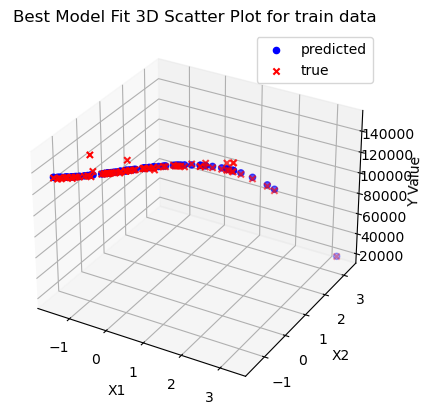

In [225]:
X = getXmat(3,trained_data_complete[:79,:2])
X = np.asarray(X)
beta = getbeta(3,trained_data_complete[:79,:2],trained_data_complete[:79,2:3])
Y_pred = np.dot(X,beta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(trained_data_complete[:79,:1],trained_data_complete[:79,1:2],Y_pred,c='b',label='predicted')
ax.scatter(trained_data_complete[:79,:1],trained_data_complete[:79,1:2],trained_data_complete[:79,2:3],c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y Value')
ax.set_title('Best Model Fit 3D Scatter Plot for train data')
ax.legend()
plt.show()

# PLOT FOR BEST MODEL FOR TEST DATA

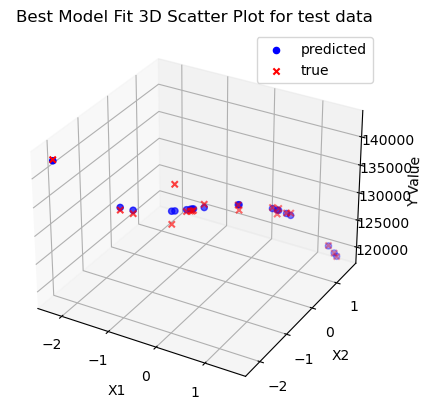

In [227]:
X = getXmat(3,test_data[:20,:2])
X = np.asarray(X)
beta = getbeta(3,test_data[:20,:2],test_data[:20,2:3])
Y_pred = np.dot(X,beta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(test_data[:20,:1],test_data[:20,1:2],Y_pred,c='b',label='predicted')
ax.scatter(test_data[:20,:1],test_data[:20,1:2],test_data[:20,2:3],c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y Value')
ax.set_title('Best Model Fit 3D Scatter Plot for test data')
ax.legend()
plt.show()